In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Elie\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install "numpy<1.24.0"


                                              0.0/14.7 MB ? eta -:--:--
                                              0.2/14.7 MB 6.1 MB/s eta 0:00:03
     -                                        0.6/14.7 MB 6.8 MB/s eta 0:00:03
     -------                                  2.8/14.7 MB 12.7 MB/s eta 0:00:01
     ----------                               3.8/14.7 MB 11.5 MB/s eta 0:00:01
     ------------                             4.4/14.7 MB 11.8 MB/s eta 0:00:01
     -------------                            4.9/14.7 MB 9.7 MB/s eta 0:00:02
     -----------------                        6.5/14.7 MB 11.2 MB/s eta 0:00:01
     ---------------------                    7.9/14.7 MB 12.6 MB/s eta 0:00:01
     -------------------------                9.5/14.7 MB 14.4 MB/s eta 0:00:01
     -----------------------------           11.1/14.7 MB 16.8 MB/s eta 0:00:01
     ---------------------------------       12.5/14.7 MB 17.2 MB/s eta 0:00:01
     -------------------------------------   14.2/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Elie\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [55]:
import numpy as np 

np.int = np.int_
np.float = np.float_
np.bool = np.bool_

In [16]:
from sklearn.datasets import load_boston

In [61]:
from sklearn.neighbors import KNeighborsRegressor  # This is a model
from sklearn.linear_model import LinearRegression  # This is another model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline  # Allows to chain processing steps after each other (then we can interact with this object instead of intereacting with several objects)
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
X, y = load_boston(return_X_y=True)  # Loading the dataset

In [ ]:
# mod = KNeighborsRegressor().fit(X,y)
# mod = LinearRegression()

# Creating the pipeline
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.get_params()

In [63]:
# Creating the model
mod = GridSearchCV(estimator=pipe,
             param_grid={"model__n_neighbors": [1,2,3,4,5,6,7,8,9,10]},
             cv=3)  # Cross validation

In [64]:
mod.fit(X, y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003994,0.001627,0.005314,0.000466,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.003323,0.001879,0.005323,0.001240,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.004657,0.001245,0.007645,0.000943,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001995,0.000002,0.003324,0.000470,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002660,0.000941,0.003989,0.000815,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.002335,0.001245,0.004645,0.000938,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.003318,0.000474,0.003323,0.000470,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.002331,0.000476,0.004648,0.000481,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.002986,0.001415,0.003657,0.000470,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002995,0.000811,0.003982,0.000820,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [58]:
pred = mod.predict(X)  # Number of predicitons = number of rows in X

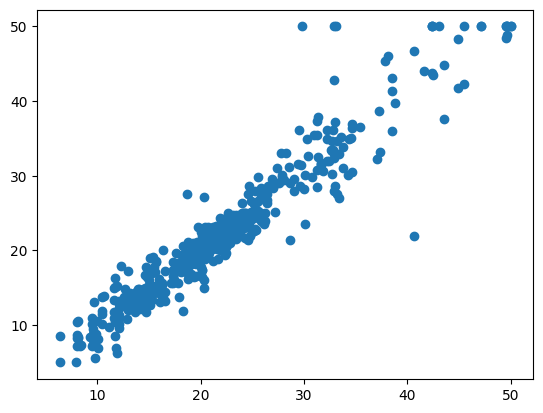

In [59]:

plt.scatter(pred, y)  # predictions on the X axis and the predicted values on the Y axis  -- This gives us an idea of how well the model is